# Gradient Boosting:
Gradient Boosting is a popular machine learning algorithm that is used for both regression and classification problems. It is an ensemble learning technique that combines the predictions of several weak learners, such as decision trees, into a strong learner.

The basic idea behind gradient boosting is to iteratively train a sequence of weak models, with each model learning to correct the errors of its predecessor. The algorithm begins by fitting a simple model to the data, such as a decision tree with only a few splits. The residuals or errors from the first model are then used to train a second model, which is designed to correct the errors of the first model. This process is repeated for a user-defined number of iterations, with each subsequent model learning to correct the errors of its predecessor. The final prediction is then the weighted sum of the predictions from each of the weak models.

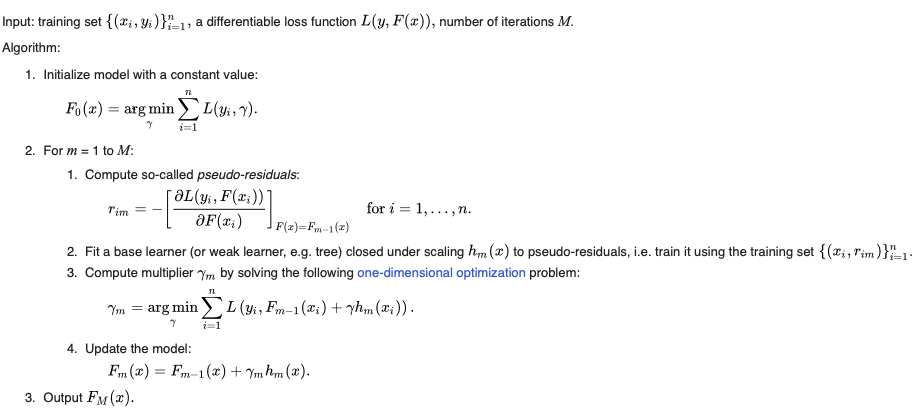

In [1]:
#Mathematics behind gradient boosting
from IPython import display
display.Image("ss/Screenshot 2023-02-17 at 1.56.07 AM.png")

# Step 1:
--> By the formula of loss we get y hat value sum(1/2(y-yˆ )ˆ2 <br>
--> To minimize the loss we find the first order derviative and from there we can calculate the value of yˆ <br>
--> yˆ simply be calculated by taking the average of all given target value <br>
## Step2:
--> Find out the residuals for each input value <br>
--> residuals= y-yˆ<br>
--> if the variance is too high we can iterate to higher value of residuals r
## Step 3:
--> last step is to update the model <br>
--> take alpha in between 0 to 1<br>
--> update the value as Yˆ+(residual_value)*alpha<br>

In [2]:
# Import models and utility functions
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


# Setting SEED for reproducibility
SEED = 1

# Importing the dataset
df = pd.read_csv("dataset/file_pe_headers.csv")
X, y =df.drop(["Name","Malware"], axis=1).to_numpy(),df["Malware"]

# Splitting dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = SEED)

# Instantiate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = SEED)

# Fit to training set
gbr.fit(train_X, train_y)

# Predict on test set
pred_y = gbr.predict(test_X)


# test set RMSE
test_rmse = MSE(test_y, pred_y) ** (1 / 2)
#print pred score
print('Score of GBR: {:.2f}'.format(gbr.score(test_X,test_y)))
# Print rmse
print('RMSE test set: {:.2f}'.format(test_rmse))



Score of GBR: 0.89
RMSE test set: 0.15


# XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

STEPS:<br>
Step 1: reading our dataset<br>
Step 2: create a train-test split.<br>
Step 3: we proceed to instantiate an XGBoost classifier with defeault parameters and fit it to our training set.<br>
Step 4: we use our XGBoost classifier to predict on the testing set. We then produce the measured accuracy of our XGBoost model's predictions.<br>

In [8]:
# Create one instance of an XGBoost and train it on the training set:
from xgboost import XGBClassifier
XGB_model_instance = XGBClassifier()
XGB_model_instance.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [10]:
# Assess its performance on the testing set
from sklearn.metrics import accuracy_score
y_test_pred = XGB_model_instance.predict(test_X)
accuracy= accuracy_score(test_y, y_test_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 99.35%
